In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.special as sp

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor, ceil
import math

def f(l):
    q = int(np.sqrt(l))
    for j in range(q, l):
        if l % j == 0:
            return max(j, l//j), min(j, l//j)
    return l, 1

def data_conversion(df):
    x, y = f(len(df))
    return np.array([[df[i] for i in range(j, j + y)] for j in range(0, len(df), y)])

def round_to_1(x):
    return round(x*10**-int(floor(log10(abs(x)))))/10**-int(floor(log10(abs(x))))

def science_notation(x, err):
    err = round_to_1(err)
    x = round(x, len(str(err))-2)
    return f'{str(x) + "0"*(len(str(err)) - len(str(x)))}±{err}', ((str(x) + "0"*(len(str(err)) - len(str(x))), str(err)))
def data_conv2(df):
    values, counts = np.unique(df, return_counts=True)
    w = counts/sum(counts)
    q = [[values[i], counts[i], str(w[i])] for i in range(len(values))]
    data = pd.DataFrame(q, columns=['Число импульсов, n', 'Число случаев', 'Доля случаев, w'])
    return data

In [3]:
with open('data\data.txt') as f:
    data = [int(_) for _ in f.readlines() if _[0] != '#']

In [4]:
n_mean = np.mean(data)
std_gen = np.std(data)
std_pya = np.sqrt(n_mean)

In [5]:
std_pya, std_gen, n_mean

(1.1187046080176841, 1.1367707552536703, 1.2515)

In [6]:
def poisson(mean, range_):
    x = np.linspace(range_[0], range_[1], 100)
    y = np.exp(-mean) * mean**x / sp.factorial(x)
    return x, y

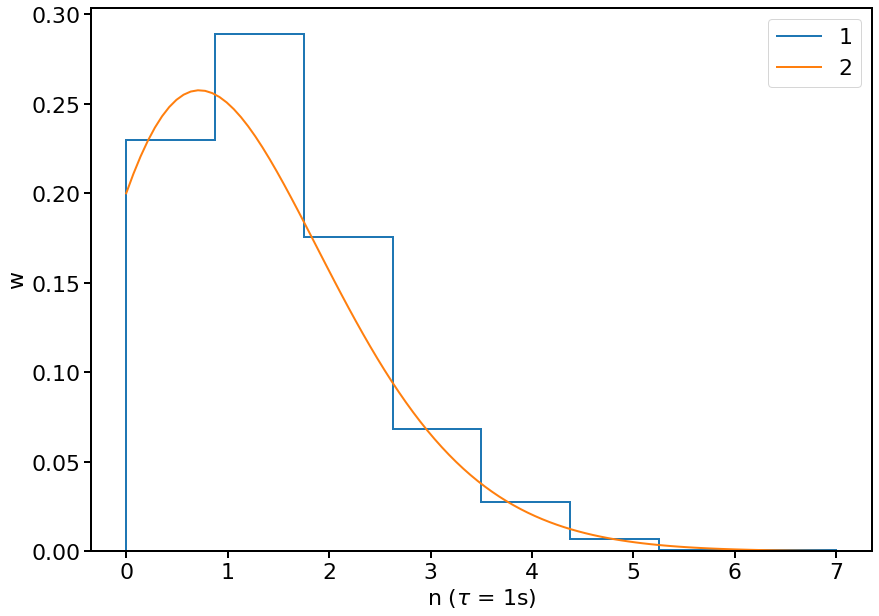

In [30]:
plt.rc('font', size=22)

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2, length=7)
ax.yaxis.set_tick_params(width=2, length=7)


q = 1
data_20 = [sum([data[i] for i in range(j, min(j+q, len(data)))]) for j in range(0, len(data), q)]
counts1, bins1 = np.histogram(data_20, len(set(data_20)), density=True)

counts, bins = np.histogram(data_20, len(set(data_20)), density=False)
ax.stairs(counts/sum(data_20), bins, label='1', linewidth=2)

X, y = poisson(n_mean, (0, 7))
ax.plot(X, y/sum(data_20)*counts[0]/counts1[0], label = '2', linewidth=2)

ax.legend(loc="upper right")

ax.set_xlabel(r"n ($\tau$ = {}s)".format(q))
ax.set_ylabel(r"w")

fig.savefig(r"D:\LabProjects\1.1.4\report\images\2.svg")

In [9]:
import math
print(np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20) + math.ceil(np.mean(data_20)-np.std(data_20)):-min(data_20)+math.floor(np.mean(data_20)+np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))
print(2*np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][math.ceil(max(0, np.mean(data_20)-2*np.std(data_20))):math.floor(np.mean(data_20)+2*np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))

1.1367707552536703 0.58175
2.2735415105073407 0.95475


In [10]:
# np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)), np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20)
science_notation(np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)))[1], np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20)

(('1.25', '0.02'), 0.014361904770560999)

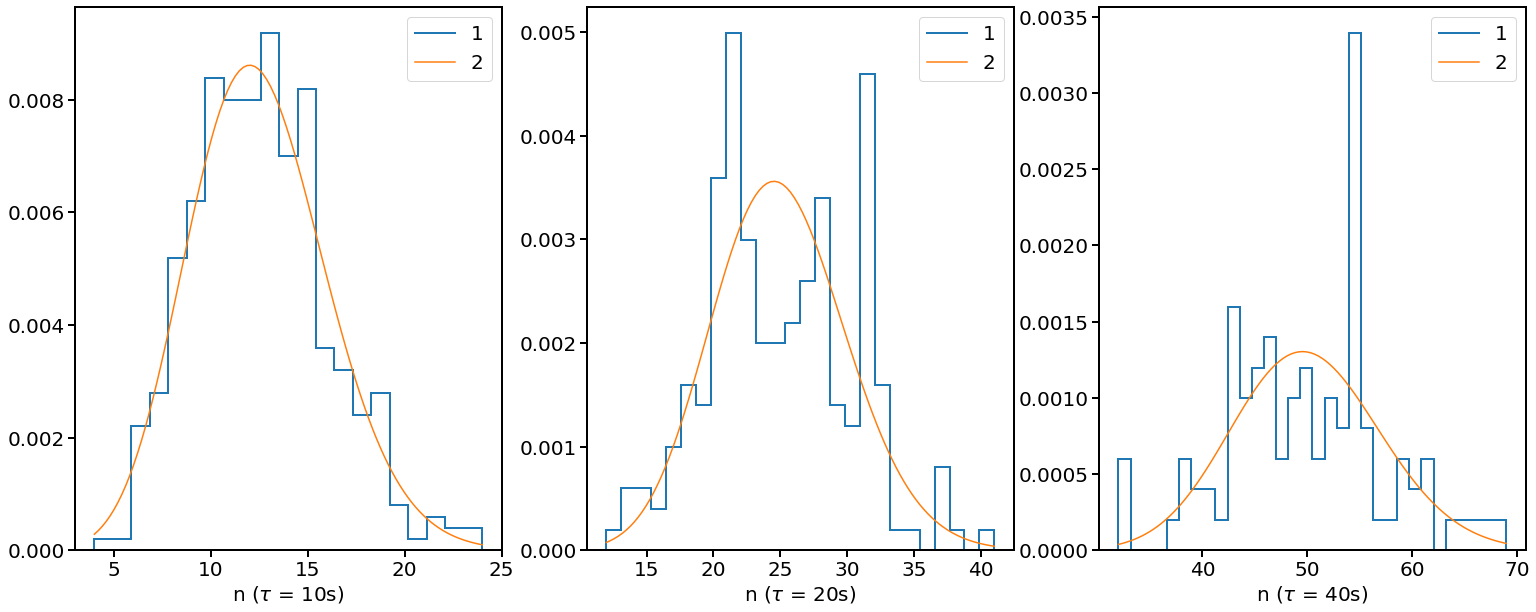

In [55]:
plt.rc('font', size=20)

qs = [10, 20, 40]
fig, axs = plt.subplots(ncols=3, figsize=(26, 10))
for t, ax in enumerate(axs):
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)

    ax.xaxis.set_tick_params(width=2, length=7)
    ax.yaxis.set_tick_params(width=2, length=7)


    q = qs[t]
    data_20 = [sum([data[i] for i in range(j, min(j+q, len(data)))]) for j in range(0, len(data), q)]
    counts1, bins1 = np.histogram(data_20, len(set(data_20)), density=True)

    counts, bins = np.histogram(data_20, len(set(data_20)), density=False)
    ax.stairs(counts/sum(data_20), bins, label='1', linewidth=2)

    X, y = poisson(np.mean(data_20), (min(bins), max(bins)))
    ax.plot(X, y/sum(data_20)*counts[0]/counts1[0], label = '2')

    ax.legend(loc="upper right")

    ax.set_xlabel(r"n ($\tau$ = {}s)".format(q))
#     axs[0].set_ylabel(r"w")

    fig.savefig(r"D:\LabProjects\1.1.4\report\images\2.svg")

Text(0, 0.5, 'w')

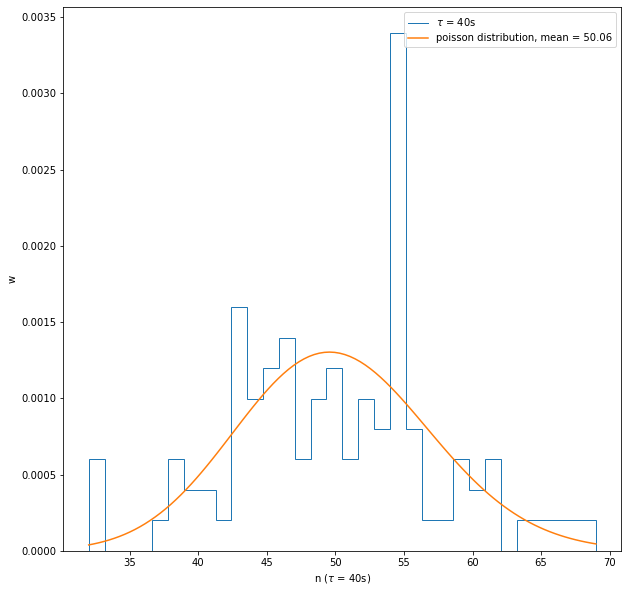

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
q = 40
data_20 = [sum([data[i] for i in range(j, min(j+q, len(data)))]) for j in range(0, len(data), q)]
counts1, bins1 = np.histogram(data_20, len(set(data_20)), density=True)
counts, bins = np.histogram(data_20, len(set(data_20)))
ax.stairs(counts/sum(data_20), bins, label=r'$\tau$ = {}s'.format(q))

X, y = poisson(np.mean(data_20), (min(bins), max(bins)))
ax.plot(X, y/sum(data_20)*counts[0]/counts1[0], label = f'poisson distribution, mean = {np.mean(data_20)}')

ax.legend(loc="upper right")

ax.set_xlabel(r"n ($\tau$ = {}s)".format(q))
ax.set_ylabel(r"w")

Text(0, 0.5, 'w')

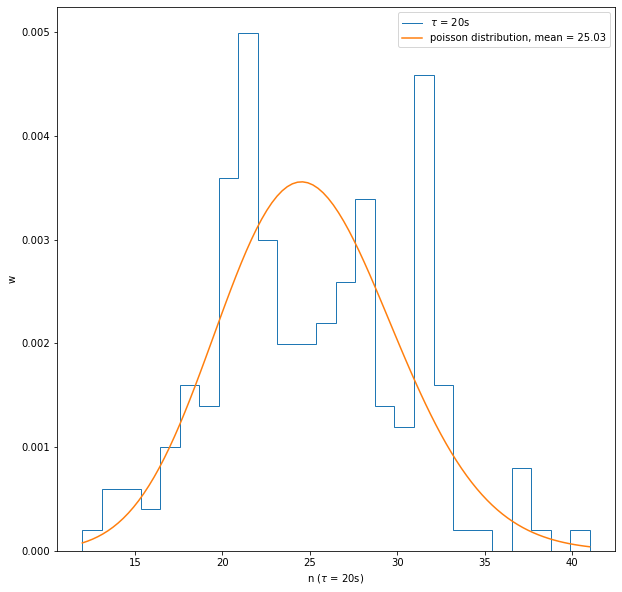

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
q = 20
data_20 = [sum([data[i] for i in range(j, min(j+q, len(data)))]) for j in range(0, len(data), q)]
counts1, bins1 = np.histogram(data_20, len(set(data_20)), density=True)
counts, bins = np.histogram(data_20, len(set(data_20)))
ax.stairs(counts/sum(data_20), bins, label=r'$\tau$ = {}s'.format(q))

X, y = poisson(np.mean(data_20), (min(bins), max(bins)))
ax.plot(X, y/sum(data_20)*counts[0]/counts1[0], label = f'poisson distribution, mean = {np.mean(data_20)}')

ax.legend(loc="upper right")

ax.set_xlabel(r"n ($\tau$ = {}s)".format(q))
ax.set_ylabel(r"w")

In [12]:
bins

array([12.        , 13.11538462, 14.23076923, 15.34615385, 16.46153846,
       17.57692308, 18.69230769, 19.80769231, 20.92307692, 22.03846154,
       23.15384615, 24.26923077, 25.38461538, 26.5       , 27.61538462,
       28.73076923, 29.84615385, 30.96153846, 32.07692308, 33.19230769,
       34.30769231, 35.42307692, 36.53846154, 37.65384615, 38.76923077,
       39.88461538, 41.        ])

In [13]:
import math
print(np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20) + math.ceil(np.mean(data_20)-np.std(data_20)):-min(data_20)+math.floor(np.mean(data_20)+np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))
print(2*np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20)+math.ceil(max(0, np.mean(data_20)-2*np.std(data_20))):-min(data_20)+math.floor(np.mean(data_20)+2*np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))

5.445098713522097 0.63
10.890197427044194 0.955


In [14]:
sum(np.unique(data_20, return_counts=True)[1][-min(data_20) + math.ceil(np.mean(data_20)-np.std(data_20)):-min(data_20)+math.floor(np.mean(data_20)+np.std(data_20))+1])

126

In [15]:
# np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)), np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20)
science_notation(np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)))[1], np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20)

(('25.0', '0.4'), 0.015382605771320898)

In [16]:
len(data_20)

200

In [18]:
# data_20 = [sum([data[i] for i in range(j, min(j+40, len(data)))]) for j in range(0, len(data), 40)]
# lst = data_conversion(data_20)
# df = pd.DataFrame(lst)
# print(df.style.to_latex())

In [19]:
'|' + '|'.join([q for q in 'lrrrrrrrrrr']) + '|'

'|l|r|r|r|r|r|r|r|r|r|r|'

3.5999687498643653 0.7325
7.199937499728731 0.965
('12.5', '0.2') 0.01438261586042495
7.50175979354178 0.61
15.00351958708356 0.93
('50.1', '0.8') 0.014985536942752257


(3.0, 25.0)

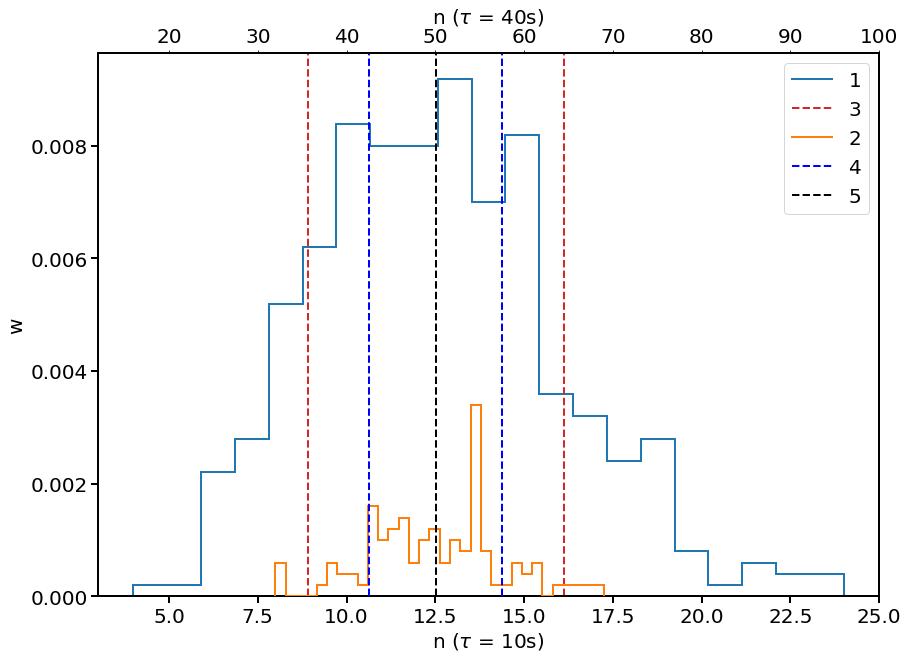

In [62]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

ax.xaxis.set_tick_params(width=2, length=7)
ax.yaxis.set_tick_params(width=2, length=7)

data_20 = [sum([data[i] for i in range(j, min(j+10, len(data)))]) for j in range(0, len(data), 10)]
counts, bins = np.histogram(data_20, len(set(data_20)))
ax.stairs(counts/sum(data_20), bins, color='C0', label='1', linewidth=2)

ax.axvline(np.mean(data_20) - np.std(data_20), color='C3', linestyle='--', linewidth=2, label='3')
ax.axvline(np.mean(data_20) + np.std(data_20), color='C3', linestyle='--', linewidth=2)

# ax.axvline(np.mean(data_20), color='C4', linestyle='--', linewidth=2, label='mean')
print(np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20) + math.ceil(np.mean(data_20)-np.std(data_20)):-min(data_20)+math.floor(np.mean(data_20)+np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))
print(2*np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20)+math.ceil(max(0, np.mean(data_20)-2*np.std(data_20))):-min(data_20)+math.floor(np.mean(data_20)+2*np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))

# np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)), np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20)
print(science_notation(np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)))[1], np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20))
ax2 = ax.twiny()
data_20 = [sum([data[i] for i in range(j, min(j+40, len(data)))]) for j in range(0, len(data), 40)]
counts, bins = np.histogram(data_20, len(set(data_20)))
ax2.stairs(counts/sum(data_20), bins, color='C1', label=r'2', linewidth=2)
print('======')
print(np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20) + math.ceil(np.mean(data_20)-np.std(data_20)):-min(data_20)+math.floor(np.mean(data_20)+np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))
print(2*np.std(data_20), sum(np.unique(data_20, return_counts=True)[1][-min(data_20)+math.ceil(max(0, np.mean(data_20)-2*np.std(data_20))):-min(data_20)+math.floor(np.mean(data_20)+2*np.std(data_20))+1])/sum(np.unique(data_20, return_counts=True)[1]))
print(science_notation(np.mean(data_20), np.std(data_20)/np.sqrt(len(data_20)))[1], np.std(data_20)/np.sqrt(len(data_20))/np.mean(data_20))
ax.set_xlabel(r"n ($\tau$ = 10s)")
ax.set_ylabel(r"w")
ax2.set_xlabel(r"n ($\tau$ = 40s)")

ax2.axvline(np.mean(data_20) - np.std(data_20), color='b', linestyle='--', linewidth=2, label='4')
ax2.axvline(np.mean(data_20) + np.std(data_20), color='b', linestyle='--', linewidth=2)

ax2.axvline(np.mean(data_20), color='k', linestyle='--', linewidth=2, label='5')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

ax2.set_xlim(12, 100)
ax.set_xlim(3, 25)

(0.0, 20.0)

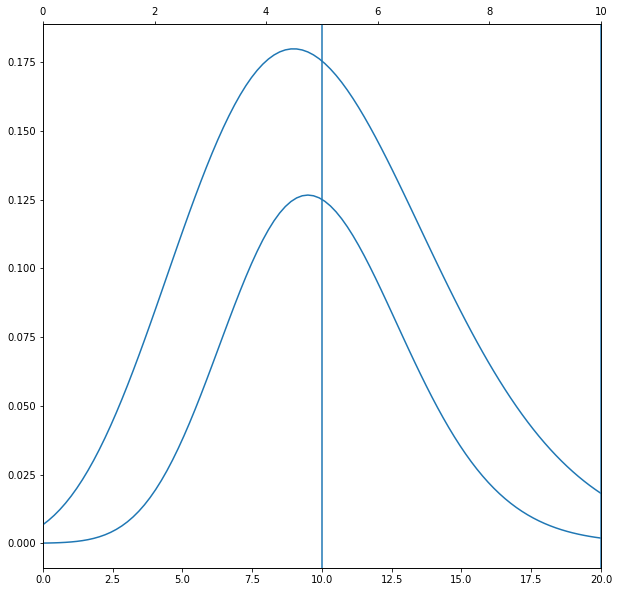

In [38]:
def poisson(mean, range_):
    x = np.linspace(range_[0], range_[1], 100)
    y = np.exp(-mean) * mean**x / sp.factorial(x)
    return x, y

x1, y1 = poisson(10, (0, 20))
x2, y2 = poisson(5, (0, 10))

fig, ax = plt.subplots(figsize=(10, 10))
ax2 = ax.twiny()

ax.plot(x1, y1)
ax2.plot(x2, y2)

ax2.axvline(5) # Средние значения совпали
ax2.axvline(10)

ax2.set_xlim(0, 10) # Совмещаем средние значения
ax.set_xlim(0, 20)